<a href="https://colab.research.google.com/github/PriscillaMuli/Data-Science/blob/main/BOOK_RECOMMENDATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

**THE BIBLIOPHILES GROUP**

A challenge that most book readers and vendors face is the vast amount of different books available that make it difficult to know which is the right kind of book they could read or stock. Thus a book recommendation engine would provide interesting book recommendations to the reader or vendor. 


The aim of the project is to build book recommendation system that would provide interesting book recommendations to the reader or vendor.

In this project we are using the Book-Crossings dataset which is a book ratings dataset that contains 1.1 million ratings of 270,000 books by 90,000 users. The ratings are on a scale from 1 to 10.

The data consists of two tables: ratings and book information tables.


# Loading required libraries

In [ ]:
#Loading required libraries
#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation
from sklearn.metrics.pairwise import pairwise_distances
import ipywidgets as widgets
from IPython.display import display, clear_output
from contextlib import contextmanager
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import os, sys
import re
from scipy.sparse import csr_matrix
from nltk.corpus import stopwords
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the dataset

In [ ]:
#Loading the books dataset

books = pd.read_csv('Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
print('\n',"*"*25)
print('\n','Shape of the books data set;',books.shape)
print('\n',"*"*25)


b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'



 *************************

 Shape of the books data set; (271360, 8)

 *************************


In [ ]:
#Loading the ratings dataset
#

ratings = pd.read_csv('Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")

print('\n',"*"*25)
print('\n','Shape of the ratings data set; ',ratings.shape)
print('\n',"*"*25)


 *************************

 Shape of the ratings data set;  (1149780, 3)

 *************************


### Specification of column names

In [ ]:
#Books data column names

books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


In [ ]:
#Ratings data column names

ratings.columns = ['userID', 'ISBN', 'bookRating']

# Individual Data preview, Cleaning and Insight drawing

## Books dataset 

In [ ]:
#Checking the top records of the books dataset

books.head() 

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Checking column data types

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ISBN               271360 non-null  object
 1   bookTitle          271360 non-null  object
 2   bookAuthor         271359 non-null  object
 3   yearOfPublication  271360 non-null  object
 4   publisher          271358 non-null  object
 5   imageUrlS          271360 non-null  object
 6   imageUrlM          271360 non-null  object
 7   imageUrlL          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Dropping unnecesssary columns in the books dataset


In [ ]:
books= books.drop(['imageUrlS','imageUrlM'],1)
books.sample(1)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlL
133732,0743400577,Suspicion,Barbara Rogan,2000,Pocket,http://images.amazon.com/images/P/0743400577.0...


Checking on  counts of  year  of publication


In [ ]:
years=  books.groupby(['yearOfPublication']).size()
years.head(10)


yearOfPublication
0       3570
1806       1
1900       1
1901       7
1902       2
1904       1
1906       1
1908       1
1910       1
1911      10
dtype: int64

we notice we have years of publication recorded as 0.

Next we dropping rows with zero as years of publication.

In [ ]:
books = books[books['yearOfPublication']!=0]
non_zero_years =  books['yearOfPublication'].groupby(books['yearOfPublication']).size().sort_values(ascending=False)
non_zero_years.head(10)


yearOfPublication
2002    13903
2001    13715
1999    13414
2000    13373
1998    12116
2003    11610
1997    11494
1996    10687
1995    10259
1994     8857
Name: yearOfPublication, dtype: int64

Book publications across years

2002 was the year with most publications


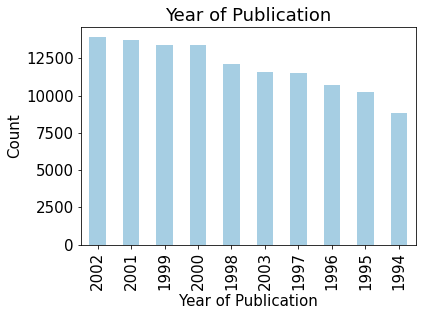

In [ ]:
plt.rc("font", size = 15)
books[books['yearOfPublication']!=0].yearOfPublication.value_counts(sort = True).head(10).plot(kind = 'bar',colormap='Paired')
plt.title('Year of Publication')
plt.xlabel('Year of Publication')
plt.ylabel('Count')
plt.plot()
plt.savefig("Year of Publication.jpg", bbox_inches = "tight", dpi = 100)
print('2002 was the year with most publications')

Top 10 authors with most books

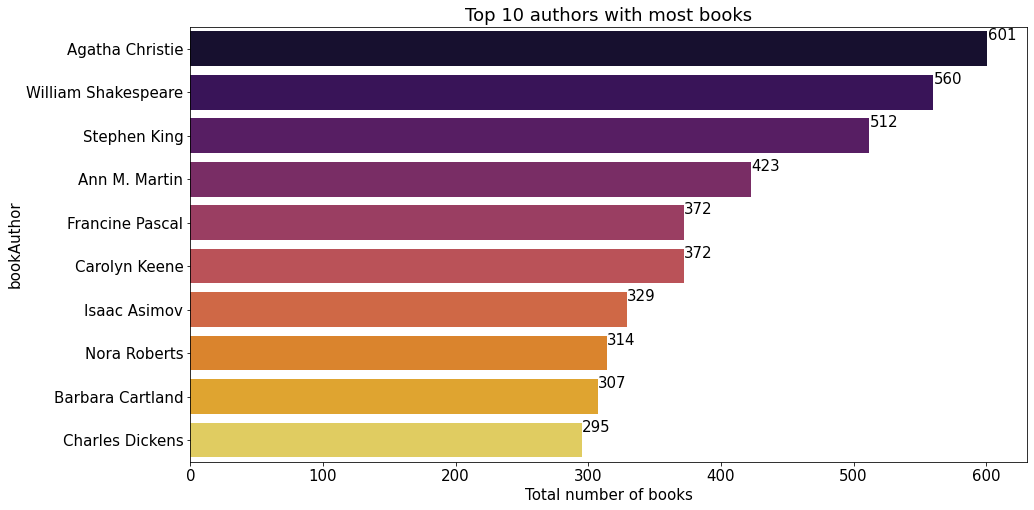

<Figure size 432x288 with 0 Axes>

In [ ]:
Top_authors = books.groupby('bookAuthor')['bookTitle'].count().reset_index().sort_values('bookTitle', ascending=False).head(10).set_index('bookAuthor')
plt.figure(figsize=(15,8))
ax = sns.barplot(Top_authors['bookTitle'], Top_authors.index, palette='inferno')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()
plt.savefig("Top 10 authors with most books.jpg", bbox_inches = "tight", dpi = 100)

### Ratings dataset preview

In [ ]:
ratings.head() 

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


Checking unique ratings

In [ ]:
ratings.bookRating.unique()


array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

# Rating Counts

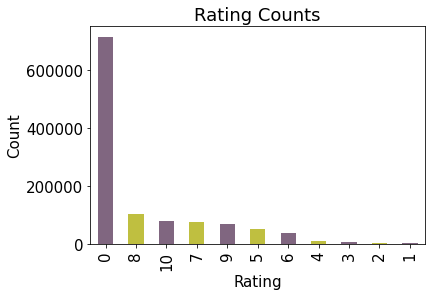

In [ ]:
plt.rc("font", size = 15)
my_colors = [(0.5,0.4,0.5), (0.75, 0.75, 0.25)]*5 #  
ratings.bookRating.value_counts(sort = True).plot(kind = 'bar', color=my_colors)
plt.title('Rating Counts')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.plot()
plt.savefig("Ratings Counts.jpg", bbox_inches = "tight", dpi = 100)


# Mapping books to respective ratings based on ISBN



### Explicit Ratings

Explicit ratings are provided by the user. They infer the user’s preference. Examples include star ratings, reviews, feedback, likes and following. Since users don't always rate products, explicit ratings can be hard to get. 
To qualify a book, it should have a rating of greater than zero by a user.

In [ ]:
#Explicit ratings (Ratings of greater than zero)
ratings_explicit = ratings[ratings.bookRating != 0]

#Implicit ratings (Ratings of zero )
ratings_implicit = ratings[ratings.bookRating == 0]

In [ ]:
#Checking shapes of explicit and implicit ratings

print('shape for new_ratings;','--------',ratings.shape)
print('shape for explicit ratings;','---',ratings_explicit.shape)
print('shape for implicit ratings;','---',ratings_implicit.shape)

shape for new_ratings; -------- (1149780, 3)
shape for explicit ratings; --- (433671, 3)
shape for implicit ratings; --- (716109, 3)


# Rating distribution

Text(0.5, 0, 'Book rating')

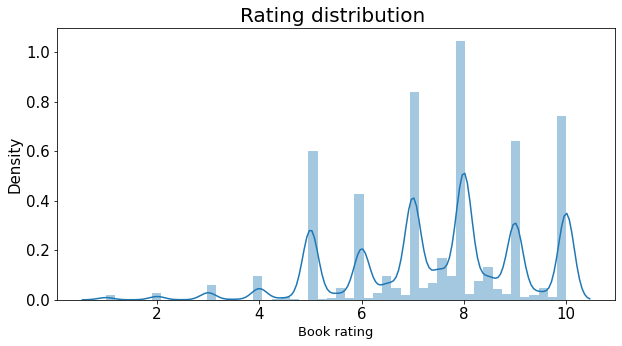

In [ ]:
fig, ax = plt.subplots(figsize=[10,5])
ratings_mean = pd.DataFrame(ratings_explicit.groupby(['ISBN'])['bookRating'].mean())
ratings_mean=ratings_mean[ratings_mean['bookRating']>0]
sns.distplot(ratings_mean['bookRating'],ax=ax)
ax.set_title('Rating distribution ',fontsize=20)
ax.set_xlabel('Book rating',fontsize=13)



Bar graph for explicit ratings

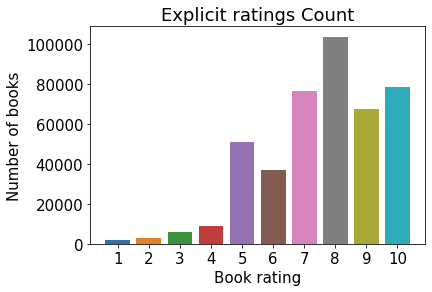

In [ ]:
sns.countplot(data = ratings_explicit, x = 'bookRating')

plt.title('Explicit ratings Count')
plt.xlabel('Book rating')
plt.ylabel('Number of books')
plt.plot()
plt.savefig("Explicit ratings Count.jpg", bbox_inches = "tight", dpi = 100)

plt.show()

#Book Ranking by Popularity in terms of rating

In [ ]:
#Recommendation of most popular books in terms of rating
#

ratings_count = pd.DataFrame(ratings_explicit.groupby(['ISBN'])['bookRating'].sum())
top10 = ratings_count.sort_values('bookRating', ascending = False).head(10)
print("Following books are recommended")
top10= pd.DataFrame(top10.merge(books, left_index = True, right_on = 'ISBN'))
top10
#Recomendedbooks=top10['bookRating','ISBN','bookTitle','bookAuthor','yearOfPublication','publisher']

Following books are recommended


,bookRating,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlL
408,5787,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...
748,4108,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...
522,3134,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...
2143,2798,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...
356,2595,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,http://images.amazon.com/images/P/0142001740.0...
26,2551,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...
1105,2524,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...
706,2402,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books,http://images.amazon.com/images/P/0446672211.0...
231,2219,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books,http://images.amazon.com/images/P/0452282152.0...


# Visuals for  books recommended  by Popularity

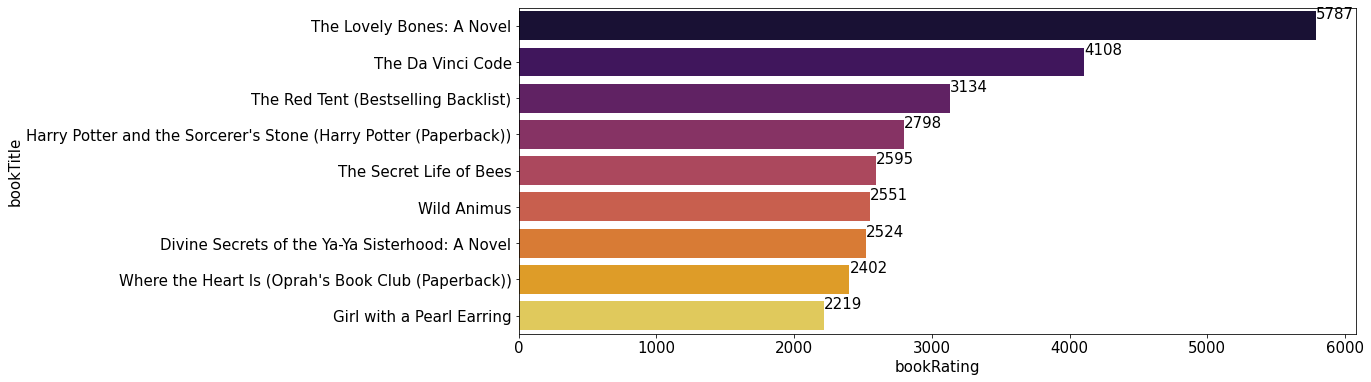

<Figure size 432x288 with 0 Axes>

In [ ]:
most_rated = top10
plt.figure(figsize=(15,6))
ax = sns.barplot(most_rated['bookRating'], most_rated.bookTitle, palette = 'inferno')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()
plt.savefig("Recommended by Popularity.jpg", bbox_inches = "tight", dpi = 100)


# Relation between Rating and Year of publication

It is observed that more recent books have a higher or better rating


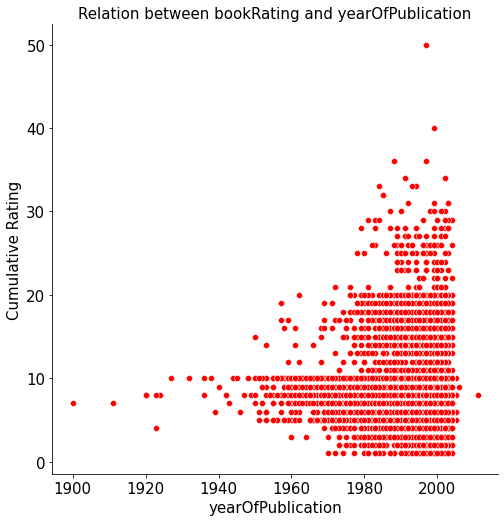

In [ ]:
ratings_count_b = pd.DataFrame(ratings_explicit.groupby(['ISBN'])['bookRating'])
ratings_count_b = ratings_count.sort_values('bookRating', ascending = False)
ratings_count_b = ratings_count_b.merge(books, left_index = True, right_on = 'ISBN')
ratings_count_b =ratings_count_b[ratings_count_b.yearOfPublication.str.contains("DK Publishing Inc") == False]
ratings_count_b["yearOfPublication"] =pd.to_numeric(ratings_count_b["yearOfPublication"])
ratings_count_b = ratings_count_b[ratings_count_b.yearOfPublication >= 1900]
ratings_count_b = ratings_count_b[ratings_count_b.yearOfPublication <= 2021]
ax = sns.relplot(data=ratings_count_b, x="yearOfPublication", y="bookRating", color = 'red', height=7, marker='o')
plt.title("Relation between bookRating and yearOfPublication",fontsize = 15)
ax.set_axis_labels("yearOfPublication", "Cumulative Rating")
plt.savefig("Relation between Rating and Year of publication.jpg", bbox_inches = "tight", dpi = 100)

print('It is observed that more recent books have a higher or better rating')

# DATASET MERGING

## Merging the books and rating datasets based on ISBN column


In [ ]:
merged_dataset = pd.merge(books,ratings,on='ISBN',how='inner')
print(merged_dataset.shape)
merged_dataset.head()


(1018392, 8)


,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlL,userID,bookRating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,41385,0


# Data Cleaning and preparation

Check for any missing data after merging

In [ ]:
merged_dataset.isna().any()

ISBN                 False
bookTitle            False
bookAuthor            True
yearOfPublication    False
publisher             True
imageUrlL             True
userID               False
bookRating           False
dtype: bool

The frequency of Missings values.
At the beginning, the question is whether there are any missings at all and, if so, how many there are.

Check for the sum of missing data points.

In [ ]:

merged_dataset.isna().sum().sum()

7

Dropping the missing values

In [ ]:
merged_dataset.dropna(inplace=True)
merged_dataset.isna().sum().sum()

0

Check for duplicates after merging

In [ ]:
merged_dataset.duplicated().any() 


False

Chek shape after merging

In [ ]:
merged_dataset.shape

(1018385, 8)

# Creating a Pivot Table of UserID against ISBN

In [ ]:
#Creating a pivot table which is a matrix of book ISBN and corresponding ratings by a user

merged_dataset_subset=merged_dataset.head(300000)

user_by_book = merged_dataset_subset.pivot(index='ISBN',columns='userID',values='bookRating')

user_by_book.head()

userID,2,8,9,10,12,14,16,17,19,20,22,23,26,32,36,39,42,44,51,53,56,64,67,68,69,70,73,75,77,78,79,81,82,83,85,86,87,88,91,92,...,278586,278601,278633,278641,278644,278645,278653,278663,278672,278681,278692,278698,278723,278724,278732,278755,278760,278769,278771,278773,278774,278778,278781,278795,278796,278798,278800,278807,278813,278818,278819,278828,278832,278836,278843,278844,278846,278849,278851,278854
ISBN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0001360469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0001374869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0002005018,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0002219476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0002245663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Fill NaN with Zero in pivot table

In [ ]:
#Fill null values with zeros in pivot table

user_by_book.fillna(0,inplace=True)
user_by_book.head()

userID,2,8,9,10,12,14,16,17,19,20,22,23,26,32,36,39,42,44,51,53,56,64,67,68,69,70,73,75,77,78,79,81,82,83,85,86,87,88,91,92,...,278586,278601,278633,278641,278644,278645,278653,278663,278672,278681,278692,278698,278723,278724,278732,278755,278760,278769,278771,278773,278774,278778,278781,278795,278796,278798,278800,278807,278813,278818,278819,278828,278832,278836,278843,278844,278846,278849,278851,278854
ISBN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0001360469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0001374869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0002005018,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0002219476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0002245663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



In real world, ratings are very sparse and data points are mostly collected from very popular books and highly engaged users. So we will reduce the noise by adding some filters and qualify the books for the final dataset.


In [ ]:
#Next we check how many books have no rating and how many users did not rate any book

no_user_rated = ratings.groupby('ISBN')['bookRating'].agg('count')

no_books_rated = ratings.groupby('userID')['bookRating'].agg('count')
print(no_user_rated.shape)
print(no_books_rated.shape)

(340556,)
(105283,)


# **Collaborative Recommendation**

Like many machine learning techniques, a recommender system makes prediction based on users’ **historical behaviors**. Specifically, it’s to predict user preference for a set of items based on past experience. To build a recommender system, the most two popular approaches are 
* **Content-based** and
* **Collaborative Filtering**.


**Content-based** approach requires a good amount of information of items’ own features, rather than using users’ interactions and feedbacks. For example, it can be movie attributes such as genre, year, director, actor etc., or textual content of articles that can extracted by applying Natural Language Processing. 

**Collaborative Filtering**, on the other hand, doesn’t need anything else except users’ historical preference on a set of items. Because it’s based on historical data, the core assumption here is that **the users who have agreed in the past tend to also agree in the future**. In terms of user preference, it usually expressed by two categories.

* **Explicit Rating**, is a rate given by a user to an item on a sliding scale, like 5 stars for Titanic. This is the most direct feedback from users to show how much they like an item. 

* **Implicit Rating**, suggests users preference indirectly, such as page views, clicks, purchase records, whether or not listen to a music track, and so on. In this project, I will take a close look at **collaborative filtering** that is a traditional and powerful tool for recommender systems.

# Nearest Neighborhood algorithm

The standard method for Collaborative Filtering is known as **Nearest Neighborhood algorithm**. There are user-based **CF** and item-based **CF**. 
* User-based CF have an n × m matrix of ratings, with user uᵢ, i = 1, ...n and item pⱼ, j=1, …m.  to predict the rating rᵢⱼ if target user i did not watch/rate an item j.
* The process calculates the similarities between target user i and all other users, select **the top X similar users, and take the weighted average of ratings from these X users with similarities as weights**.

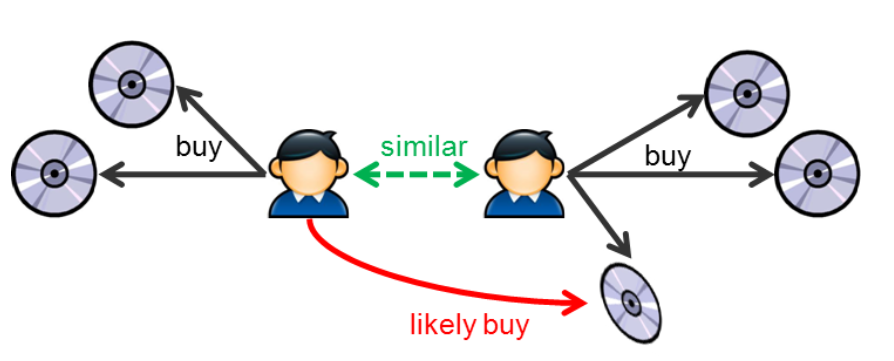

* Without knowing anything about items and users themselves, we think two users are similar when they give the same item similar ratings . 

* Analogously, for Item-based CF, we say two items are similar when they received similar ratings from a same user.

* Then, we will make prediction for a target user on an item by calculating weighted average of ratings on most X similar items from this user. 

* One key advantage of Item-based CF is the stability which is that the ratings on a given item will not change significantly overtime, unlike the tastes of human beings.

## STEP 1.Cosine distance metric

Cosine similarity is a metric used to determine how similar the documents are irrespective of their size.

Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. In this context, the two vectors are arrays containing books and rating records.

We have utilized cosine distance metric since it is fast and preferable to the pearson coefficient.

# Cosine distance metric function

In [ ]:
#Cosine distance metric function

csr_data = csr_matrix(user_by_book.values)
user_by_book.reset_index(inplace=True)

##STEP 2.Building the Nearest Neighborhood Algorithm

In [ ]:
#Training the algorithm

NNA = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)

In [ ]:
#Fitting the NNA model based on csr_data

NNA = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
NNA.fit(csr_data)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                 radius=1.0)

##STEP 3.Recommendation Function

In [ ]:
#Building the recommendation function

def get_book_recommendation(book_name):
    n_books_to_reccomend = 10
    book_list = books[books['bookTitle'].str.contains(book_name)]  
    if len(book_list):        
        book_idx= book_list.iloc[0]['ISBN']
        book_idx = user_by_book[user_by_book['ISBN'] == book_idx].index[0]
        
        distances , indices = NNA.kneighbors(csr_data[book_idx],n_neighbors=n_books_to_reccomend+1)    
        rec_book_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),\
                               key=lambda x: x[1])[:0:-1]
        
        recommend_frame = []
        
        for val in rec_book_indices:
            book_idx = user_by_book.iloc[val[0]]['ISBN']
            idx = books[books['ISBN'] == book_idx].index
            recommend_frame.append({'bookTitle':books.iloc[idx]['bookTitle'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_books_to_reccomend+1))
        return df
    
    else:
        
        return "No books found. Please check your input"

# Excution of Recommendations

##(i). Making recommendations for a book base on a known book tittle

In [ ]:
#Making recommendations for a book

recommendation=get_book_recommendation('The Da Vinci Code')
recommendation

,bookTitle,Distance
1,POSSESSIONS,0.927238
2,Doomsday Book,0.926438
3,"The Game of Kings (Lymond Chronicles, 1)",0.924702
4,The Immaculate,0.923401
5,Pilgrim at Tinker Creek,0.921181
6,Suzanne's Diary for Nicholas,0.918969
7,Life Before Man,0.917047
8,The Haunting,0.915675
9,Crazy Horse,0.913369
10,Angels &amp; Demons,0.851840


##(ii). Displaying the cover page for the recommended books

AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)


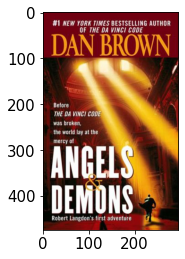

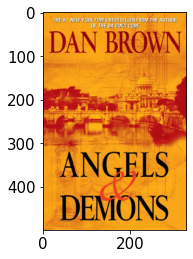

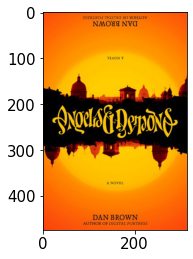

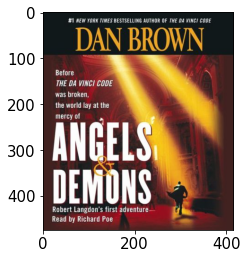

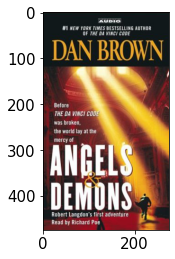

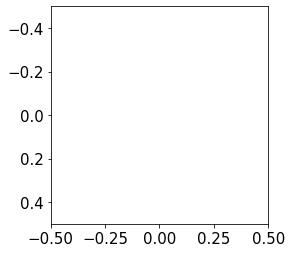

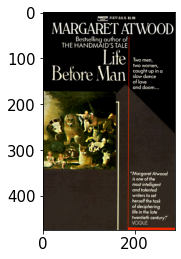

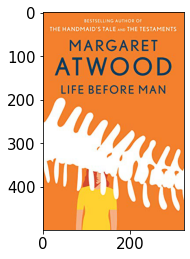

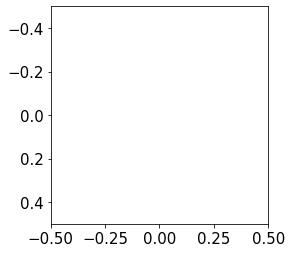

In [ ]:
#Displaying the cover page of recommended books

rec=pd.merge(books,recommendation,on='bookTitle',how='inner')
for i in rec['imageUrlL']:
        response = requests.get(i)
        img = Image.open(BytesIO(response.content))
        plt.figure()
        print(plt.imshow(img))

# Conclusion

Our project was a success as were able to build book recommendation system that would provide interesting book recommendations to the reader or vendor as well as images of these books.

The collaborative recommendation used the cosine similarity approach.

In general,The Lovely Bones Novel written by Alice Sebold published in	2002 by Little, Brown was the most popular book with a high total ratings.

We faced a challenge with data scraping.